# Predict Future Sales

As was stated in the proposal document, there are 4 data sets that contain the data of the sales, the list of products, the product categories and the list of stores. Furthermore, the execution of this projects was done by using the proposed methodology mentioned in the proposal document which has three steps: analyze and generate the features for each dataset, consolidate the daily information to monthly and analyze the algorithms and choose the best one. 

In [0]:
%pylab inline

In [10]:
#Importing the necessary libraries
import dataiku
import pandas as pd, numpy as np
from sklearn import *
from dataiku import pandasutils as pdu

/home/cemirandaro/dataiku-dss-4.1.4/python.packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/cemirandaro/dataiku-dss-4.1.4/python.packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/home/cemirandaro/dataiku-dss-4.1.4/python.packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0

# A) Analyze and generate the features for each dataset

In this step, I firstly analyzed the datasets shops, items and item categories and I observed that there was one common characteristic. This characteristic was that all of these datasets were basically lists of objects (store, product and category) and I believed that I needed to learn from the description of each line, so I generated more features based on the text column to get some insights. 

For example, in the item category dataset, at the beginning I only had 2 columns which indicate the name and the ID, as it is seen in the table below.

In [12]:
#loading the dataset
item_categories = dataiku.Dataset("item_categories")
item_categories_df = item_categories.get_dataframe()
item_categories_df.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


After analyzing this dataset, I added some other features such as the length of the category name, the number of words that the category name has, and some tfid columns that will help the computer to know the importance of a word among all the category names and through this way the computer learns something from them. 

In [13]:
feature_cnt = 25 #define the maximum number of features I want to generate

In [14]:
#Text Features for the item_categories dataset
tfidf = feature_extraction.text.TfidfVectorizer(max_features=feature_cnt)
item_categories_df['item_category_name_len'] = item_categories_df['item_category_name'].map(len)  #Lenth of Item Category Description
item_categories_df['item_category_name_wc'] = item_categories_df['item_category_name'].map(lambda x: len(str(x).split(' '))) #Item Category Description Word Count
txtFeatures = pd.DataFrame(tfidf.fit_transform(item_categories_df['item_category_name']).toarray())
cols = txtFeatures.columns
for i in range(feature_cnt):
    item_categories_df['item_category_name_tfidf_' + str(i)] = txtFeatures[cols[i]]
item_categories_df.head()

,item_category_name,item_category_id,item_category_name_len,item_category_name_wc,item_category_name_tfidf_0,item_category_name_tfidf_1,item_category_name_tfidf_2,item_category_name_tfidf_3,item_category_name_tfidf_4,item_category_name_tfidf_5,item_category_name_tfidf_6,item_category_name_tfidf_7,item_category_name_tfidf_8,item_category_name_tfidf_9,item_category_name_tfidf_10,item_category_name_tfidf_11,item_category_name_tfidf_12,item_category_name_tfidf_13,item_category_name_tfidf_14,item_category_name_tfidf_15,item_category_name_tfidf_16,item_category_name_tfidf_17,item_category_name_tfidf_18,item_category_name_tfidf_19,item_category_name_tfidf_20,item_category_name_tfidf_21,item_category_name_tfidf_22,item_category_name_tfidf_23,item_category_name_tfidf_24
0,PC - Гарнитуры/Наушники,0,40,3,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Аксессуары - PS2,1,26,3,0.0,0.0,0.0,0.0,0.780837,0.000000,0.000000,0.000000,0.0,0.0,0.624735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Аксессуары - PS3,2,26,3,0.0,0.0,0.0,0.0,0.000000,0.780837,0.000000,0.000000,0.0,0.0,0.624735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Аксессуары - PS4,3,26,3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.780837,0.000000,0.0,0.0,0.624735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Аксессуары - PSP,4,26,3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.780837,0.0,0.0,0.624735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The same principle was applied to the shops dataset and items dataset.

In [15]:
#loading the dataset
items = dataiku.Dataset("items")
items_df = items.get_dataframe()

#Text Features for the items dataset
tfidf = feature_extraction.text.TfidfVectorizer(max_features=feature_cnt)
items_df['item_name_len'] = items_df['item_name'].map(len) #Lenth of Item Description
items_df['item_name_wc'] = items_df['item_name'].map(lambda x: len(str(x).split(' '))) #Item Description Word Count
txtFeatures = pd.DataFrame(tfidf.fit_transform(items_df['item_name']).toarray())
cols = txtFeatures.columns
for i in range(feature_cnt):
    items_df['item_name_tfidf_' + str(i)] = txtFeatures[cols[i]]
items_df.head()

,item_name,item_id,item_category_id,item_name_len,item_name_wc,item_name_tfidf_0,item_name_tfidf_1,item_name_tfidf_2,item_name_tfidf_3,item_name_tfidf_4,item_name_tfidf_5,item_name_tfidf_6,item_name_tfidf_7,item_name_tfidf_8,item_name_tfidf_9,item_name_tfidf_10,item_name_tfidf_11,item_name_tfidf_12,item_name_tfidf_13,item_name_tfidf_14,item_name_tfidf_15,item_name_tfidf_16,item_name_tfidf_17,item_name_tfidf_18,item_name_tfidf_19,item_name_tfidf_20,item_name_tfidf_21,item_name_tfidf_22,item_name_tfidf_23,item_name_tfidf_24
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,64,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,!ABBYY FineReader 12 Professional Edition Full...,1,76,82,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.637898,0.0,0.0,0.0,0.0,0.442678,0.0,0.0,0.0,0.403761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.483839
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,56,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,59,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,***КОРОБКА (СТЕКЛО) D,4,40,56,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


Generating the text features for the shop dataset

In [16]:
#loading the dataset
shops = dataiku.Dataset("shops")
shops_df = shops.get_dataframe()

#Text Features for the shop dataset
tfidf = feature_extraction.text.TfidfVectorizer(max_features=feature_cnt)
shops_df['shop_name_len'] = shops_df['shop_name'].map(len)  #Lenth of Shop Name
shops_df['shop_name_wc'] = shops_df['shop_name'].map(lambda x: len(str(x).split(' '))) #Shop Name Word Count
txtFeatures = pd.DataFrame(tfidf.fit_transform(shops_df['shop_name']).toarray())
cols = txtFeatures.columns

for i in range(feature_cnt):
    shops_df['shop_name_tfidf_' + str(i)] = txtFeatures[cols[i]]
shops_df.head()

,shop_name,shop_id,shop_name_len,shop_name_wc,shop_name_tfidf_0,shop_name_tfidf_1,shop_name_tfidf_2,shop_name_tfidf_3,shop_name_tfidf_4,shop_name_tfidf_5,shop_name_tfidf_6,shop_name_tfidf_7,shop_name_tfidf_8,shop_name_tfidf_9,shop_name_tfidf_10,shop_name_tfidf_11,shop_name_tfidf_12,shop_name_tfidf_13,shop_name_tfidf_14,shop_name_tfidf_15,shop_name_tfidf_16,shop_name_tfidf_17,shop_name_tfidf_18,shop_name_tfidf_19,shop_name_tfidf_20,shop_name_tfidf_21,shop_name_tfidf_22,shop_name_tfidf_23,shop_name_tfidf_24
0,"!Якутск Орджоникидзе, 56 фран",0,51,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,1.000000
1,"!Якутск ТЦ ""Центральный"" фран",1,52,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.322815,0.0,0.689588,0.648274
2,"Адыгея ТЦ ""Мега""",2,28,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.866844,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.498580,0.0,0.000000,0.000000
3,"Балашиха ТРК ""Октябрь-Киномир""",3,55,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.000000,0.000000
4,"Волжский ТЦ ""Волга Молл""",4,43,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.905675,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.423972,0.0,0.000000,0.000000


Until this part, I have generated all the features for the shops, items and item_categories datasets and producing new datasets as it is shown in the following image.

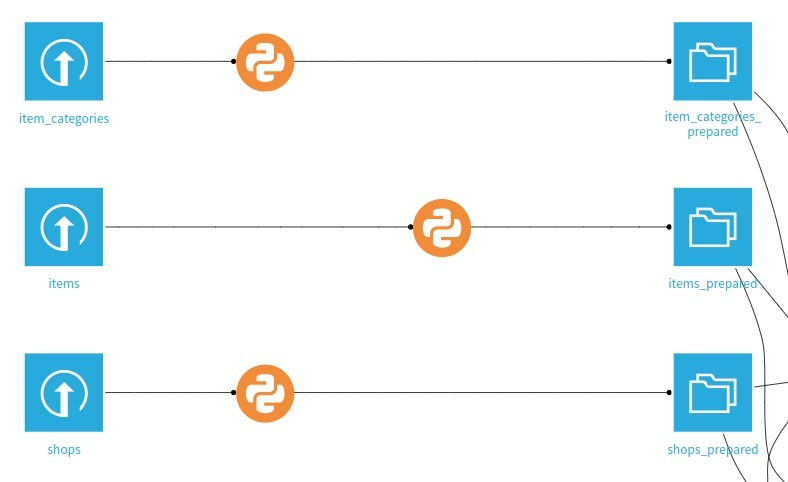

In [9]:
from IPython.display import Image
PATH = "/home/cemirandaro/Pictures/"
Image(filename = PATH + "items_itemscategories_shops_generated.jpg", width=600, height=200)

Second, I observe that in the sales dataset I can extract the month and year from the date and eliminate the item price because for the purpose of this project, this column is not relevant.  

In [20]:
train = dataiku.Dataset("sales_train_v2")
train_df = train.get_dataframe()

train_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [21]:
#Extracting the month and year and eliminating the item_price
#Generating the sales_train_data dataset that contains the train data I am going to use.

train_df['date'] = pd.to_datetime(train_df['date'], format='%d.%m.%Y')
train_df['month'] = train_df['date'].dt.month
train_df['year'] = train_df['date'].dt.year
train_df = train_df.drop(['date','item_price'], axis=1)

sales_train_data = dataiku.Dataset("sales_train_data")
sales_train_data.write_with_schema(train_df)

train_df.head()

2935849 rows successfully written (PLOIP4UJp8)


,date_block_num,shop_id,item_id,item_cnt_day,month,year
0,0,59,22154,1.0,1,2013
1,0,25,2552,1.0,1,2013
2,0,25,2552,-1.0,1,2013
3,0,25,2554,1.0,1,2013
4,0,25,2555,1.0,1,2013


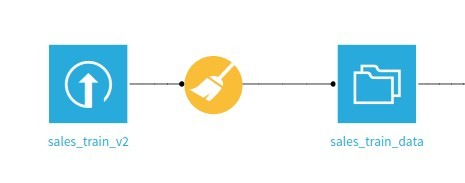

In [8]:
Image(filename = PATH + "sales_train_data_generated.jpg", width=400, height=183)

# B) Consolidate the daily information to monthly

Because of the prediction had to be on monthly basis and all the sales information was on daily basis, I needed to group the sales per product, store and month to obtain the total number of items per product and store. After that, I needed to get the mean of the sales and the number of items sold the previous month. 

In [24]:
sales_train_data = dataiku.Dataset("sales_train_data")
sales_train_data_df = sales_train_data.get_dataframe()

#grouping the data per month
sales_train_data_df = sales_train_data_df.groupby([c for c in sales_train_data_df.columns if c not in ['item_cnt_day']], as_index=False)[['item_cnt_day']].sum()
sales_train_data_df = sales_train_data_df.rename(columns={'item_cnt_day':'item_cnt_month'})

#Monthly Avg
shop_item_monthly_mean = sales_train_data_df[['shop_id','item_id','item_cnt_month']].groupby(['shop_id','item_id'], as_index=False)[['item_cnt_month']].mean()
shop_item_monthly_mean = shop_item_monthly_mean.rename(columns={'item_cnt_month':'item_cnt_month_avg'})

#Add Mean Feature into the Train dataset 
sales_train_data_df = pd.merge(sales_train_data_df, shop_item_monthly_mean, how='left', on=['shop_id','item_id'])

#Get the Last Month data (Oct 2015) and then rename the column to prev_month
shop_item_prev_month = sales_train_data_df[sales_train_data_df['date_block_num'] == 33][['shop_id','item_id','item_cnt_month']]
shop_item_prev_month = shop_item_prev_month.rename(columns={'item_cnt_month':'item_cnt_prev_month'})

#Add Previous Month Feature into the Train dataset and fill the Null values with ZERO!
sales_train_data_df = pd.merge(sales_train_data_df, shop_item_prev_month, how='left', on=['shop_id','item_id']).fillna(0.)


#setting up the sales_train_data_grouped dataset 
sales_train_data_grouped = dataiku.Dataset("sales_train_data_grouped")
sales_train_data_grouped.write_with_schema(sales_train_data_df)

sales_train_data_df.head()

1609124 rows successfully written (72j1pcGzxA)


,date_block_num,shop_id,item_id,month,year,item_cnt_month,item_cnt_month_avg,item_cnt_prev_month
0,0,0,32,1,2013,6.0,8.0,0.0
1,0,0,33,1,2013,3.0,3.0,0.0
2,0,0,35,1,2013,1.0,7.5,0.0
3,0,0,43,1,2013,1.0,1.0,0.0
4,0,0,51,1,2013,2.0,2.5,0.0


I also generated from sales_train_data two other datasets containing the grouped quantity of sold items of the previous month (sales_shop_item_prev_month) and the other dataset the mean of the number of items sold per product and store (sales_shop_item_monthly). These datasets will help me in the next step to make the test dataset in the same structure than the train dataset. 

In [25]:
#setting up the sales_shop_item_monthly_avg dataset 
sales_shop_item_monthly_avg = dataiku.Dataset("sales_shop_item_monthly_avg")
sales_shop_item_monthly_avg.write_with_schema(shop_item_monthly_mean)

#setting up the sales_shop_item_prev_month dataset 
sales_shop_item_prev_month = dataiku.Dataset("sales_shop_item_prev_month")
sales_shop_item_prev_month.write_with_schema(shop_item_prev_month)

424124 rows successfully written (AUXDn581UI)
31531 rows successfully written (RFHkaWjYiE)


In [26]:
shop_item_monthly_mean.head()

,shop_id,item_id,item_cnt_month_avg
0,0,30,31.0
1,0,31,11.0
2,0,32,8.0
3,0,33,3.0
4,0,35,7.5


In [27]:
shop_item_prev_month.head()

,shop_id,item_id,item_cnt_prev_month
1577593,2,31,1.0
1577594,2,486,3.0
1577595,2,787,1.0
1577596,2,794,1.0
1577597,2,968,1.0


Until now, I have done this part of the flow. 

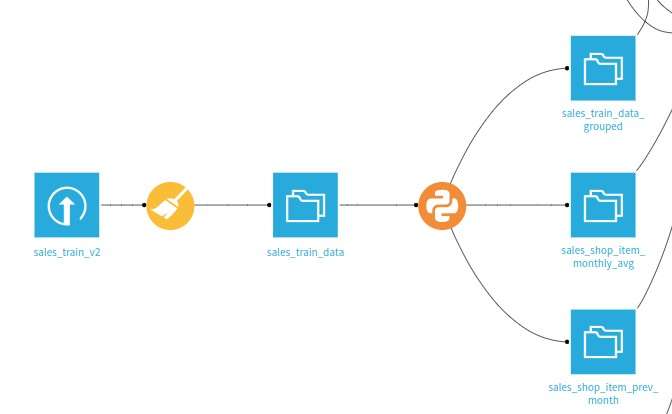

In [28]:
Image(filename = PATH + "datasets_generated_from_monthlysales.jpg")

# C) Analyze the algorithms and choose the best one 

After having generated the new shops, item categories and items datasets with all the new features, I had to join them with the dataset called “sales_train_data_grouped” and start generating the possible models. This new dataset is called “sales_data_prepared”.


In [29]:
#Items features
sales_train_data_df = pd.merge(sales_train_data_df, items_df, how='left', on='item_id')
#Item Category features
sales_train_data_df = pd.merge(sales_train_data_df, item_categories_df, how='left', on='item_category_id')
#Shops features
sales_train_data_df = pd.merge(sales_train_data_df, shops_df, how='left', on='shop_id')

#setting up the prepared train dataset
sales_data_prepared = dataiku.Dataset("sales_data_prepared")
sales_data_prepared.write_with_schema(sales_train_data_df)
sales_train_data_df.head()

1609124 rows successfully written (KdRIoH0nE3)


,date_block_num,shop_id,item_id,month,year,item_cnt_month,item_cnt_month_avg,item_cnt_prev_month,item_name,item_category_id,item_name_len,item_name_wc,item_name_tfidf_0,item_name_tfidf_1,item_name_tfidf_2,item_name_tfidf_3,item_name_tfidf_4,item_name_tfidf_5,item_name_tfidf_6,item_name_tfidf_7,item_name_tfidf_8,item_name_tfidf_9,item_name_tfidf_10,item_name_tfidf_11,item_name_tfidf_12,item_name_tfidf_13,item_name_tfidf_14,item_name_tfidf_15,item_name_tfidf_16,item_name_tfidf_17,item_name_tfidf_18,item_name_tfidf_19,item_name_tfidf_20,item_name_tfidf_21,item_name_tfidf_22,item_name_tfidf_23,item_name_tfidf_24,item_category_name,item_category_name_len,item_category_name_wc,item_category_name_tfidf_0,item_category_name_tfidf_1,item_category_name_tfidf_2,item_category_name_tfidf_3,item_category_name_tfidf_4,item_category_name_tfidf_5,item_category_name_tfidf_6,item_category_name_tfidf_7,item_category_name_tfidf_8,item_category_name_tfidf_9,item_category_name_tfidf_10,item_category_name_tfidf_11,item_category_name_tfidf_12,item_category_name_tfidf_13,item_category_name_tfidf_14,item_category_name_tfidf_15,item_category_name_tfidf_16,item_category_name_tfidf_17,item_category_name_tfidf_18,item_category_name_tfidf_19,item_category_name_tfidf_20,item_category_name_tfidf_21,item_category_name_tfidf_22,item_category_name_tfidf_23,item_category_name_tfidf_24,shop_name,shop_name_len,shop_name_wc,shop_name_tfidf_0,shop_name_tfidf_1,shop_name_tfidf_2,shop_name_tfidf_3,shop_name_tfidf_4,shop_name_tfidf_5,shop_name_tfidf_6,shop_name_tfidf_7,shop_name_tfidf_8,shop_name_tfidf_9,shop_name_tfidf_10,shop_name_tfidf_11,shop_name_tfidf_12,shop_name_tfidf_13,shop_name_tfidf_14,shop_name_tfidf_15,shop_name_tfidf_16,shop_name_tfidf_17,shop_name_tfidf_18,shop_name_tfidf_19,shop_name_tfidf_20,shop_name_tfidf_21,shop_name_tfidf_22,shop_name_tfidf_23,shop_name_tfidf_24
0,0,0,32,1,2013,6.0,8.0,0.0,1+1,40,3,1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Кино - DVD,14,3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"!Якутск Орджоникидзе, 56 фран",51,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,33,1,2013,3.0,3.0,0.0,1+1 (BD),37,8,2,0.0,0.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Кино - Blu-Ray,18,3,0.0,0.603779,0.0,0.0,0.0,0.0,0.0,0.0,0.603779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.520482,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"!Якутск Орджоникидзе, 56 фран",51,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,0,35,1,2013,1.0,7.5,0.0,10 ЛЕТ СПУСТЯ,40,22,3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Кино - DVD,14,3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"!Якутск Орджоникидзе, 56 фран",51,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,43,1,2013,1.0,1.0,0.0,100 МИЛЛИОНОВ ЕВРО,40,31,3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Кино - DVD,14,3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"!Якутск Орджоникидзе, 56 фран",51,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0,51,1,2013,2.0,2.5,0.0,100 лучших произведений классики (mp3-CD) (Dig...,57,78,6,0.0,0.0,0.0,0.0,0.545735,0.621307,0.0,0.0,0.0,0.0,0.562273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Музыка - MP3,18,3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,"!Якутск Орджоникидзе, 56 фран",51,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

Making the test dataset to the same format than the final train dataset

In [10]:
test = dataiku.Dataset("test")
test_df = test.get_dataframe()

test_df['month'] = 11
test_df['year'] = 2015
test_df['date_block_num'] = 34
#Add Mean Feature
test_df = pd.merge(test_df, shop_item_monthly_mean, how='left', on=['shop_id','item_id']).fillna(0.)
#Add Previous Month Feature
test_df = pd.merge(test_df, shop_item_prev_month, how='left', on=['shop_id','item_id']).fillna(0.)
#Items features
test_df = pd.merge(test_df, items_df, how='left', on='item_id')
#Item Category features
test_df = pd.merge(test_df, item_categories_df, how='left', on='item_category_id')
#Shops features
test_df = pd.merge(test_df, shops_df, how='left', on='shop_id')
test_df['item_cnt_month'] = 0.


test_prepared = dataiku.Dataset("test_prepared")
test_prepared.write_with_schema(test_df)
test_df.head()

214200 rows successfully written (7cqeascu3y)


,ID,shop_id,item_id,month,year,date_block_num,item_cnt_month_avg,item_cnt_prev_month,item_name,item_category_id,item_name_len,item_name_wc,item_name_tfidf_0,item_name_tfidf_1,item_name_tfidf_2,item_name_tfidf_3,item_name_tfidf_4,item_name_tfidf_5,item_name_tfidf_6,item_name_tfidf_7,item_name_tfidf_8,item_name_tfidf_9,item_name_tfidf_10,item_name_tfidf_11,item_name_tfidf_12,item_name_tfidf_13,item_name_tfidf_14,item_name_tfidf_15,item_name_tfidf_16,item_name_tfidf_17,item_name_tfidf_18,item_name_tfidf_19,item_name_tfidf_20,item_name_tfidf_21,item_name_tfidf_22,item_name_tfidf_23,item_name_tfidf_24,item_category_name,item_category_name_len,item_category_name_wc,item_category_name_tfidf_0,item_category_name_tfidf_1,item_category_name_tfidf_2,item_category_name_tfidf_3,item_category_name_tfidf_4,item_category_name_tfidf_5,item_category_name_tfidf_6,item_category_name_tfidf_7,item_category_name_tfidf_8,item_category_name_tfidf_9,item_category_name_tfidf_10,item_category_name_tfidf_11,item_category_name_tfidf_12,item_category_name_tfidf_13,item_category_name_tfidf_14,item_category_name_tfidf_15,item_category_name_tfidf_16,item_category_name_tfidf_17,item_category_name_tfidf_18,item_category_name_tfidf_19,item_category_name_tfidf_20,item_category_name_tfidf_21,item_category_name_tfidf_22,item_category_name_tfidf_23,item_category_name_tfidf_24,shop_name,shop_name_len,shop_name_wc,shop_name_tfidf_0,shop_name_tfidf_1,shop_name_tfidf_2,shop_name_tfidf_3,shop_name_tfidf_4,shop_name_tfidf_5,shop_name_tfidf_6,shop_name_tfidf_7,shop_name_tfidf_8,shop_name_tfidf_9,shop_name_tfidf_10,shop_name_tfidf_11,shop_name_tfidf_12,shop_name_tfidf_13,shop_name_tfidf_14,shop_name_tfidf_15,shop_name_tfidf_16,shop_name_tfidf_17,shop_name_tfidf_18,shop_name_tfidf_19,shop_name_tfidf_20,shop_name_tfidf_21,shop_name_tfidf_22,shop_name_tfidf_23,shop_name_tfidf_24,item_cnt_month
0,0,5,5037,11,2015,34,1.444444,0.0,"NHL 15 [PS3, русские субтитры]",19,45,5,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,Игры - PS3,14,3,0.0,0.0,0.0,0.0,0.0,0.846395,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.532556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Вологда ТРЦ ""Мармелад""",40,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,5,5320,11,2015,34,0.000000,0.0,ONE DIRECTION Made In The A.M.,55,31,7,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,Музыка - CD локального производства,63,5,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,"Вологда ТРЦ ""Мармелад""",40,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,11,2015,34,2.000000,1.0,"Need for Speed Rivals (Essentials) [PS3, русск...",19,69,8,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.68577,0.0,0.000000,0.441193,0.0,0.0,0.0,0.0,0.578850,0.0,0.0,0.0,Игры - PS3,14,3,0.0,0.0,0.0,0.0,0.0,0.846395,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.532556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Вологда ТРЦ ""Мармелад""",40,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,5,5232,11,2015,34,1.000000,0.0,"Need for Speed Rivals (Classics) [Xbox 360, ру...",23,72,9,0.0,0.588259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.554199,0.356989,0.0,0.0,0.0,0.0,0.468373,0.0,0.0,0.0,Игры - XBOX 360,19,4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.807725,0.0,0.0,0.0,0.589560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Вологда ТРЦ ""Мармелад""",40,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4,5,5268,11,2015,34,0.000000,0.0,"Need for Speed [PS4, русская версия]",20,49,6,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.606187,0.

Until now, I have generated the final train dataset (sales_data_prepared) and the final test dataset (test_prepared) having both the same format. 

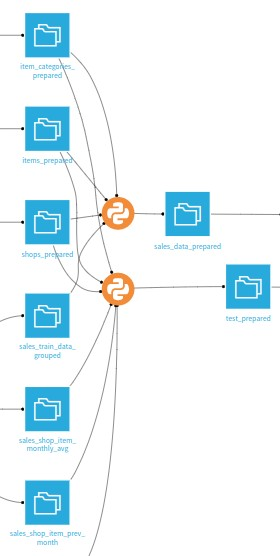

In [30]:
Image(filename = PATH + "final_train_and_test_datasets.jpg")

After creating a new analysis and selected the possible algorithms to use, the DSS showed me that the most suitable algorithm is the Random Forest so this is the one with which I built the model. 

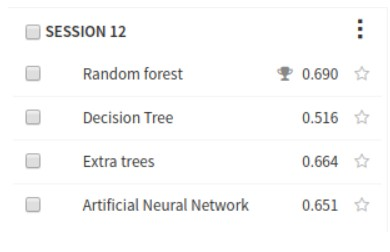

In [31]:
Image(filename = PATH + "used_algorithms.jpg")

I also tried to apply some ensemble algorithms, but the result was lower than the Random Forest.

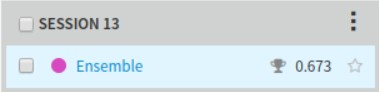

In [32]:
Image(filename = PATH + "ensemble_algorithm_result.jpg")

Therefore, I can proceed to generate the model as it is shown in the following image.

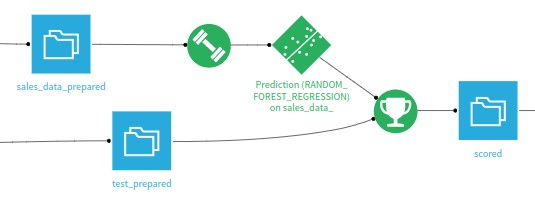

In [33]:
Image(filename = PATH + "model_generated.jpg")

The final workflow is the one that is shown in the following image.

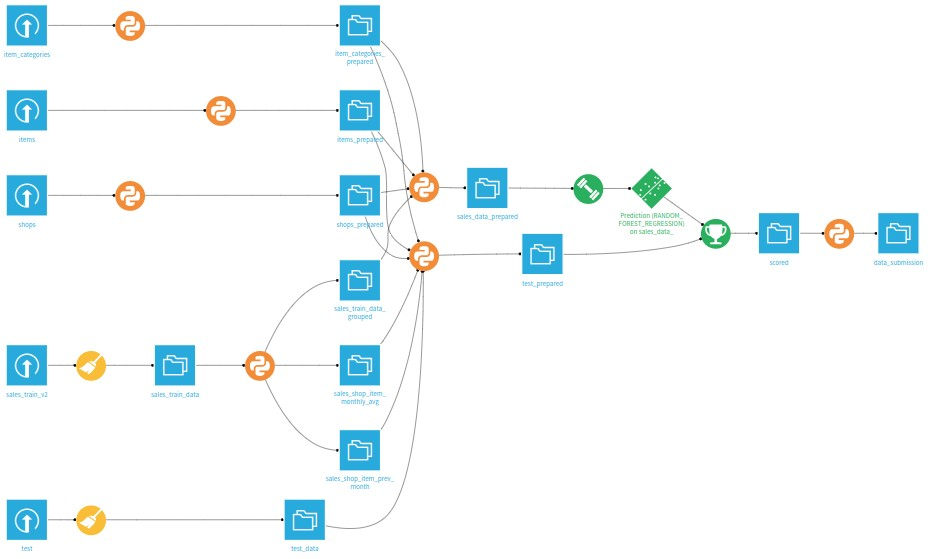

In [34]:
Image(filename = PATH + "final_workflow.jpg")

# Ethical Implications

The unique ethical implication I could find for this project is that I, as a consultant, do not have to show or share the data of the company to any other person who does not belong to the project because of the several consequences it could bring to the customer company. For example, this data can be useful for other competitors to have the knowledge of how well or bad 1C company is going and therefore, take decisions to affect it. 

# Future Considerations

<strong>1. Use of external data </strong><br>
Get the average weather conditions for each month of this dataset, the season of each month and if any special event that happened in inside a month to have a more realistic result.
<br><br>
<strong>2. Improve the model to make it for the whole year </strong><br>
Currently, the model proposed can only predict one month (Nov 2015) so the improvement needed would be to modify the model in order to make it for not only a specific month. 
